**Optimizing Emergency Room Wait Times in Ontario's Healthcare System**
--------------------------
--------------------------

## **Team Members (Group-7)**:

- **Dheeraj Kuldeep Choudhary** - 9014533
- **Harika Ravi** - 9032698
- **Nasr Alani** - 9039537
- **Paljeet Singh Sambhi** - 8918495   
- **Priyanka Chitikela** - 8909667

## **Case Study**:

Ontario’s emergency rooms (ERs) struggle with excessive wait times, averaging eight hours—twice the global standard. The most significant delay occurs during the initial assessment, where patients first meet healthcare professionals, often taking up to three hours. Addressing this inefficiency is crucial for improving patient care and hospital operations. Traditional solutions, such as increasing staff or expanding facilities, are limited by budget constraints and workforce shortages. Existing research does not fully address how inefficient processes, miscommunication, and technological gaps contribute to these delays.

This study examines the role of patient prioritization, information flow, and resource management in ER efficiency. It explores how AI-driven triage systems and real-time wait-time displays can optimize the initial assessment process and reduce delays. By identifying root causes and evaluating technology-based solutions, this research aims to provide practical recommendations for improving ER workflows and enhancing healthcare service delivery in Ontario.

## **Import libraries**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import calendar
from scipy.stats import zscore

## **Load and display the dataset**

In [4]:
# Load the dataset
file_path = "./er_wait_times_ontario_updated.csv"
df = pd.read_csv(file_path)

## **Exploratory Data Analysis**

### 1.Data Overview & Summary

In [5]:
print(df.head())
summary_stats = df.describe()
display(summary_stats)

           Hospital    Region        Date  Age               CTAS_Level  \
0     St. Michael's   Toronto  2024-12-14   55  CTAS I-III (Discharged)   
1  Hamilton General  Hamilton  2024-03-28   27   CTAS IV-V (Discharged)   
2        Sunnybrook   Toronto  2024-10-20   74  CTAS I-III (Discharged)   
3     St. Michael's   Toronto  2024-06-18   39  CTAS I-III (Discharged)   
4   Toronto General   Toronto  2024-05-10   53  CTAS I-III (Discharged)   

   WaitTime_Hours  ER_Occupancy DayOfWeek  Season  
0             2.0            84  Saturday  Winter  
1             1.4            97  Thursday  Spring  
2             7.6            68    Sunday    Fall  
3             2.8            73   Tuesday  Summer  
4             5.2            98    Friday  Spring  


,Age,WaitTime_Hours,ER_Occupancy
count,5000.000000,5000.000000,5000.000000
mean,44.761200,4.555780,104.026000
std,19.743083,5.338732,55.065733
min,0.000000,0.100000,10.000000
25%,31.000000,1.800000,56.000000
50%,45.000000,3.000000,105.000000
75%,58.000000,5.100000,152.000000
max,100.000000,76.600000,199.000000


### 2. Check for missingness in dataset

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine both into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Display the missing values report
print("\nMissing Values Report:")
print(missing_data)

# Check if there are any missing values
if missing_values.any():
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values found in the dataset.")


Missing Values Report:
                Missing Values  Percentage (%)
Hospital                     0             0.0
Region                       0             0.0
Date                         0             0.0
Age                          0             0.0
CTAS_Level                   0             0.0
WaitTime_Hours               0             0.0
ER_Occupancy                 0             0.0
DayOfWeek                    0             0.0
Season                       0             0.0

No missing values found in the dataset.


### 3.Distribution of ER Wait Times (Histogram)

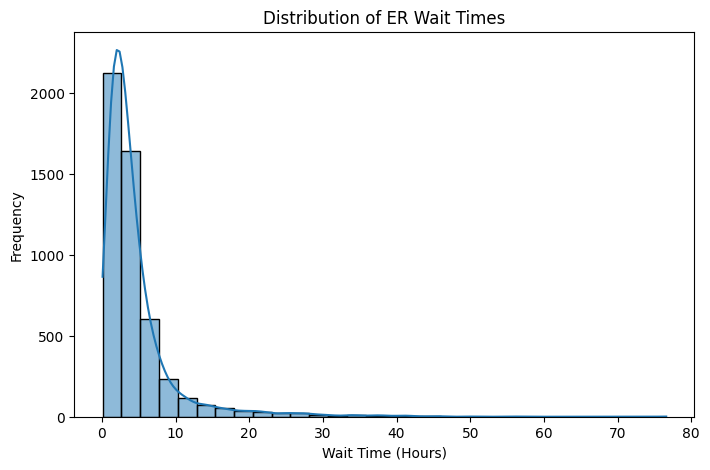

In [7]:
# Histogram of Wait Times
plt.figure(figsize=(8, 5))
sns.histplot(df["WaitTime_Hours"], bins=30, kde=True)
plt.xlabel("Wait Time (Hours)")
plt.ylabel("Frequency")
plt.title("Distribution of ER Wait Times")
plt.show()

**Interpretation:**

* The histogram shows that ER wait times are right-skewed, meaning most patients experience shorter wait times, but there are a few cases with extreme delays.
* The highest frequency of ER visits occurs within 0-5 hours, but some patients experience much longer wait times, extending beyond 30+ hours.
* The kde (kernel density estimate) curve further supports the right-skewed distribution, suggesting that most patients do not wait very long, but some extreme cases significantly increase the average wait time.
* This insight highlights the need for better resource allocation and faster triage processes to reduce extreme waiting periods.

### 4. Date Parsing & Feature Engineering

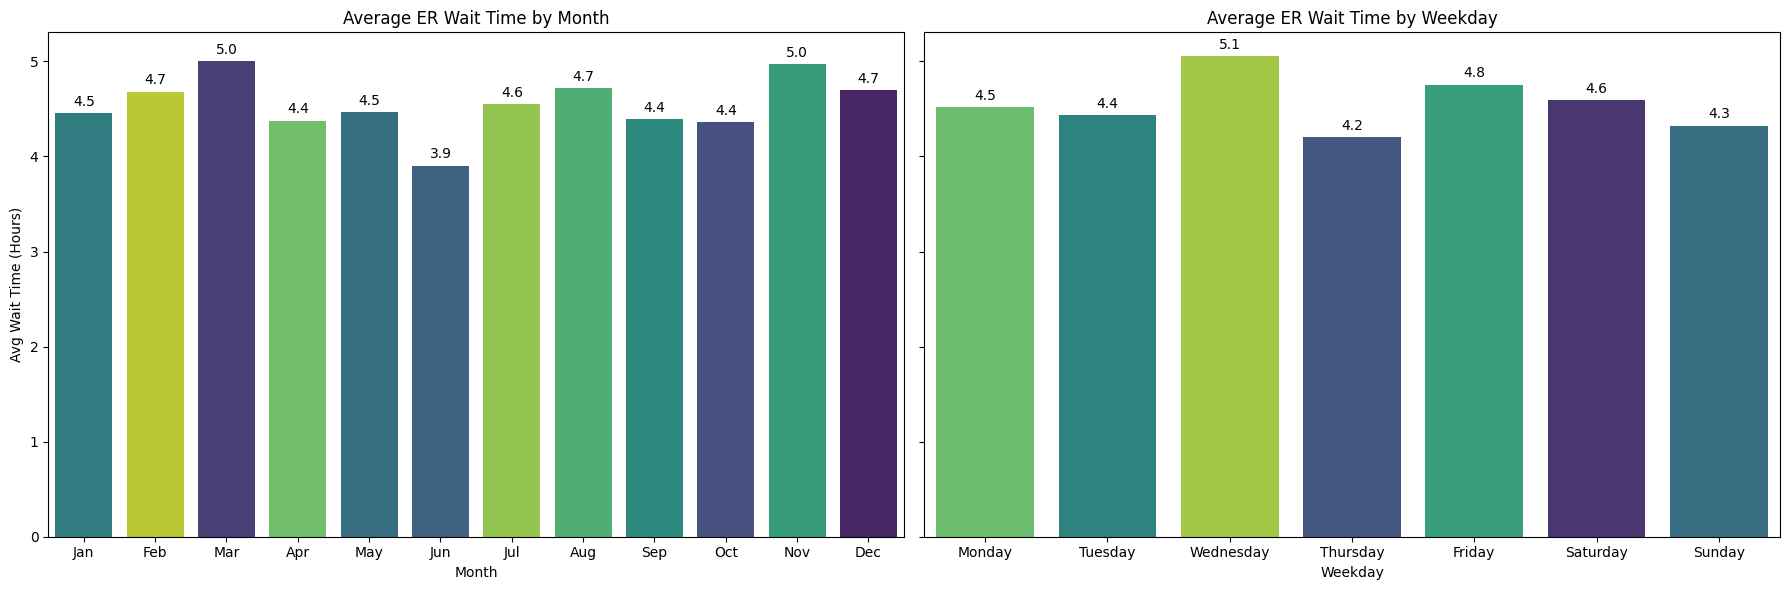

In [31]:
# Ensurng 'Month' is in numeric format and 'Date' is a datetime object
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

# Created a new column for month abbreviation
df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

# Defining the order for months and weekdays
month_order = list(calendar.month_abbr)[1:]  # ['Jan', 'Feb', ..., 'Dec']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set up the matplotlib figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot 1: Average ER Wait Time by Month
sns.barplot(ax=axes[0], data=df, x='Month_Name', y='WaitTime_Hours', hue='Month_Name',estimator='mean', order=month_order, errorbar=None, palette='viridis', legend=False)
axes[0].set_title('Average ER Wait Time by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Avg Wait Time (Hours)')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f', padding=3)

# Plot 2: Average ER Wait Time by Weekday
sns.barplot(ax=axes[1], data=df, x='Weekday', y='WaitTime_Hours', hue='Weekday', estimator='mean', order=weekday_order, errorbar=None, palette='viridis', legend=False)
axes[1].set_title('Average ER Wait Time by Weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f', padding=3)

# Display the plots
plt.tight_layout()
plt.show()


### 5.Outlier Detection – Using Z-scores or boxplots for WaitTime_Hours, Age

Outliers in WaitTime_Hours: 128
Outliers in Age: 0


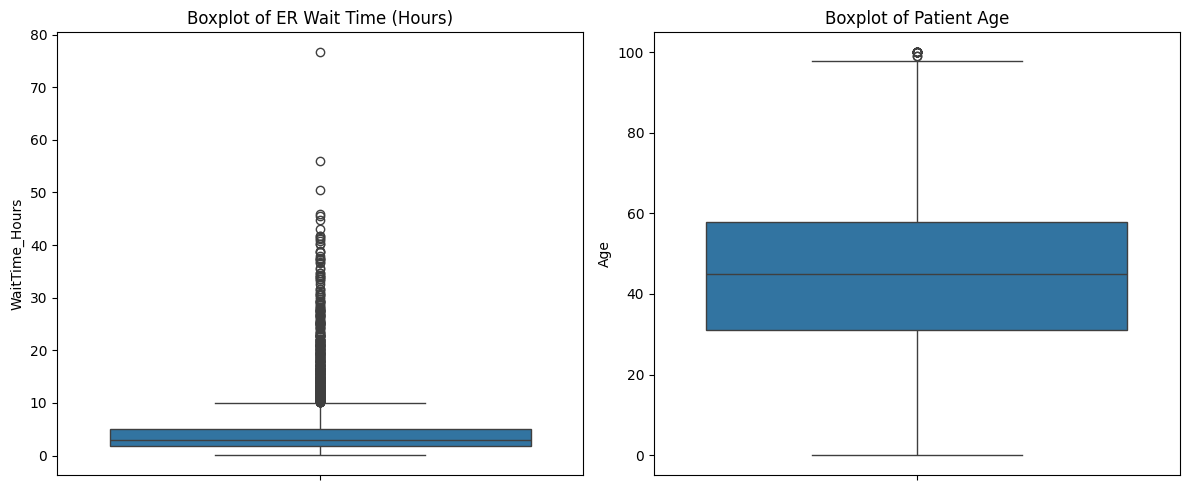

In [32]:
# Compute Z-scores
df['WaitTime_Z'] = zscore(df['WaitTime_Hours'])
df['Age_Z'] = zscore(df['Age'])

# Define threshold for outliers
threshold = 3

# Identify outliers
wait_time_outliers = df[abs(df['WaitTime_Z']) > threshold]
age_outliers = df[abs(df['Age_Z']) > threshold]

print(f"Outliers in WaitTime_Hours: {len(wait_time_outliers)}")
print(f"Outliers in Age: {len(age_outliers)}")

# Plot boxplots for visualizing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='WaitTime_Hours')
plt.title('Boxplot of ER Wait Time (Hours)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Age')
plt.title('Boxplot of Patient Age')

plt.tight_layout()
plt.show()

### 6. Categorical Breakdown – Analysis of CTAS_Level, Season, DayOfWeek, etc

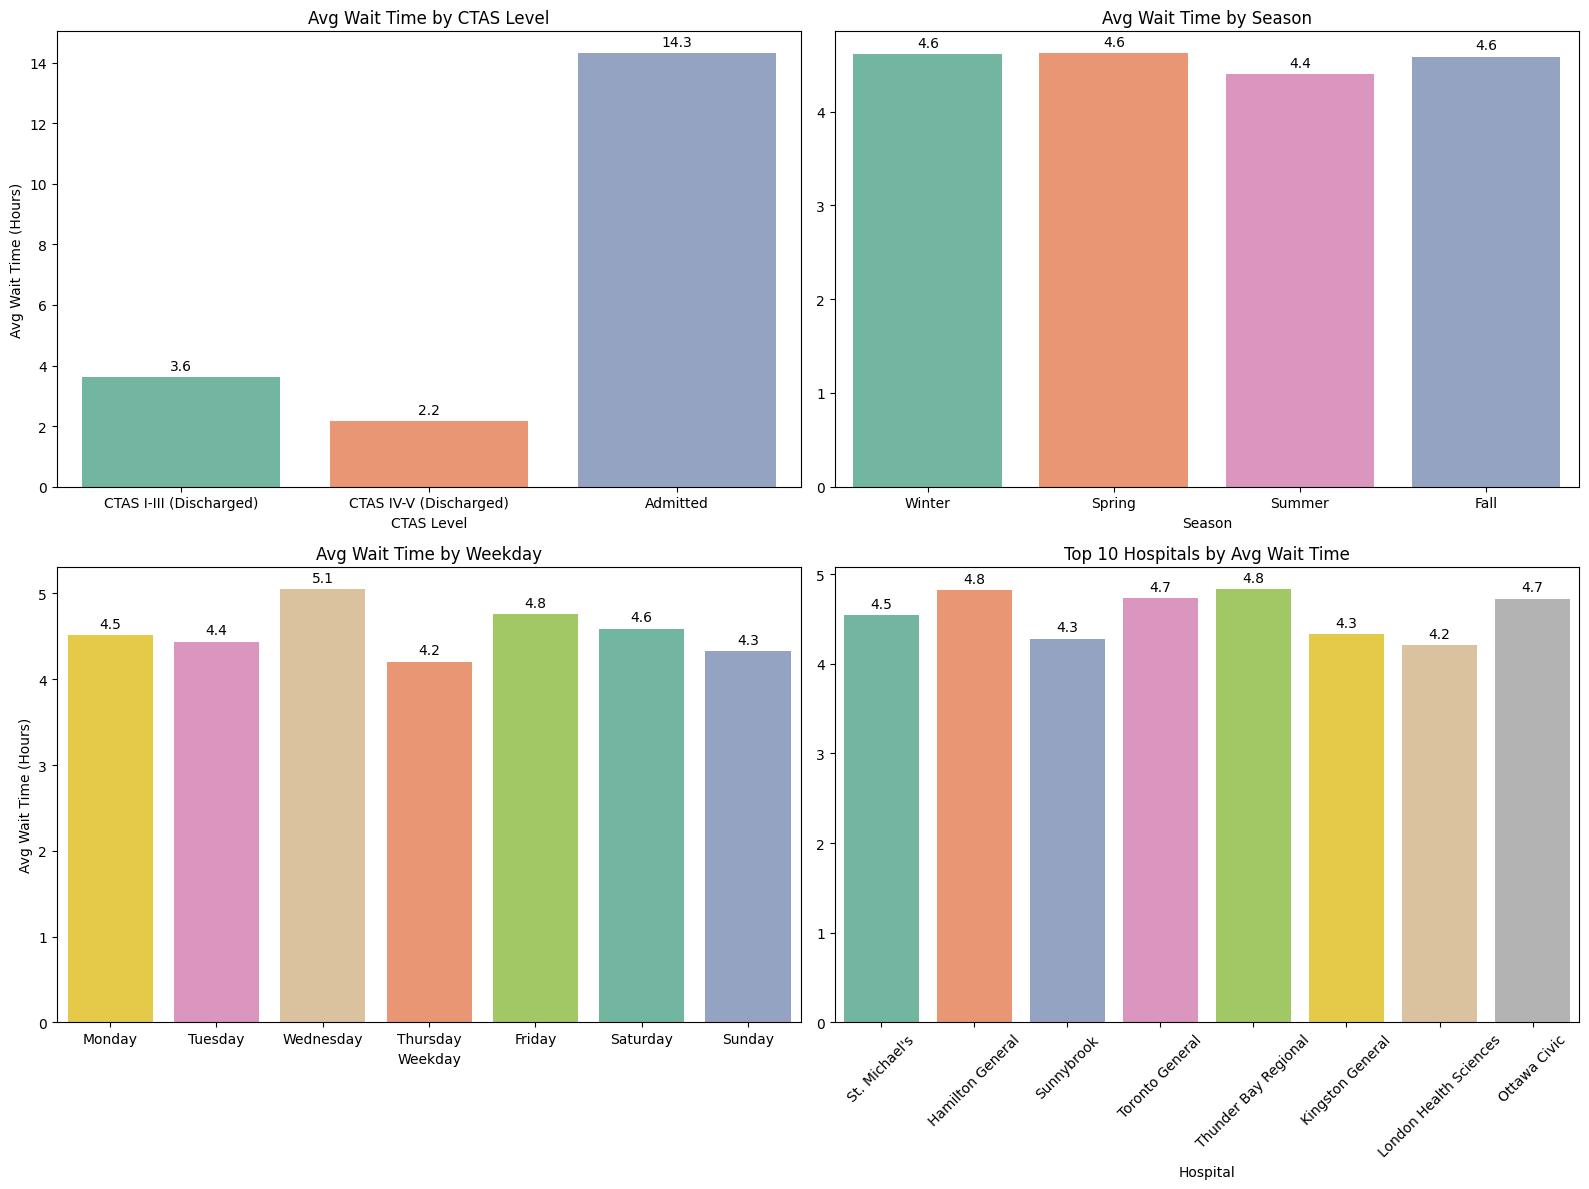

In [34]:
plt.figure(figsize=(16, 12))

# 1. CTAS Level vs Wait Time
plt.subplot(2, 2, 1)
ax1 = sns.barplot(data=df, x='CTAS_Level', y='WaitTime_Hours', hue='CTAS_Level',
                  estimator='mean', errorbar=None, palette='Set2', legend=False)
ax1.set_title('Avg Wait Time by CTAS Level')
ax1.set_xlabel('CTAS Level')
ax1.set_ylabel('Avg Wait Time (Hours)')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f', padding=3)

# 2. Season vs Wait Time
plt.subplot(2, 2, 2)
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
ax2 = sns.barplot(data=df, x='Season', y='WaitTime_Hours', hue='Season',
                  order=season_order, estimator='mean', errorbar=None, palette='Set2', legend=False)
ax2.set_title('Avg Wait Time by Season')
ax2.set_xlabel('Season')
ax2.set_ylabel('')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f', padding=3)

# 3. Day of Week vs Wait Time
plt.subplot(2, 2, 3)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax3 = sns.barplot(data=df, x='DayOfWeek', y='WaitTime_Hours', hue='DayOfWeek',
                  order=weekday_order, estimator='mean', errorbar=None, palette='Set2', legend=False)
ax3.set_title('Avg Wait Time by Weekday')
ax3.set_xlabel('Weekday')
ax3.set_ylabel('Avg Wait Time (Hours)')
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f', padding=3)

# 4. Top 10 Hospitals by Avg Wait Time
plt.subplot(2, 2, 4)
top_hospitals = df.groupby('Hospital')['WaitTime_Hours'].mean().sort_values(ascending=False).head(10).index.tolist()
ax4 = sns.barplot(data=df[df['Hospital'].isin(top_hospitals)], x='Hospital', y='WaitTime_Hours', hue='Hospital',
                  estimator='mean', errorbar=None, palette='Set2', legend=False)
ax4.set_title('Top 10 Hospitals by Avg Wait Time')
ax4.set_xlabel('Hospital')
ax4.set_ylabel('')
ax4.tick_params(axis='x', rotation=45)
for container in ax4.containers:
    ax4.bar_label(container, fmt='%.1f', padding=3)

# Layout adjustment
plt.tight_layout()
plt.show()

### 7. Group-wise Aggregations – e.g., average wait time per hospital, season, CTAS level

In [36]:
# 1. Average wait time by CTAS Level
ctas_group = df.groupby('CTAS_Level')['WaitTime_Hours'].agg(['count', 'mean', 'median', 'std']).reset_index()
print("📊 Average Wait Time by CTAS Level:")
display(ctas_group)

# 2. Average wait time by Season
season_group = df.groupby('Season')['WaitTime_Hours'].agg(['count', 'mean', 'median', 'std']).reset_index()
print("\n📊 Average Wait Time by Season:")
display(season_group)

# 3. Average wait time by Day of Week (ordered)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_group = df.groupby('DayOfWeek')['WaitTime_Hours'].agg(['count', 'mean', 'median', 'std']).reindex(weekday_order).reset_index()
print("\n📊 Average Wait Time by Weekday:")
display(weekday_group)

# 4. Top 10 Hospitals by Avg Wait Time
hospital_group = df.groupby('Hospital')['WaitTime_Hours'].agg(['count', 'mean', 'median', 'std'])
top10_hospitals = hospital_group.sort_values(by='mean', ascending=False).head(10).reset_index()
print("\n📊 Top 10 Hospitals by Avg Wait Time:")
display(top10_hospitals)

📊 Average Wait Time by CTAS Level:


,CTAS_Level,count,mean,median,std
0,Admitted,607,14.323723,11.8,9.624477
1,CTAS I-III (Discharged),3168,3.604230,3.1,2.268683
2,CTAS IV-V (Discharged),1225,2.176490,1.9,1.379300



📊 Average Wait Time by Season:


,Season,count,mean,median,std
0,Fall,1228,4.586726,3.00,5.345271
1,Spring,1216,4.624095,3.05,5.814353
2,Summer,1289,4.403801,3.00,4.694750
3,Winter,1267,4.614838,3.10,5.472857



📊 Average Wait Time by Weekday:


,DayOfWeek,count,mean,median,std
0,Monday,739,4.519215,3.0,5.702682
1,Tuesday,672,4.438839,2.9,5.086289
2,Wednesday,719,5.053547,3.0,6.236833
3,Thursday,716,4.206285,2.9,4.864135
4,Friday,716,4.755866,3.3,5.414741
5,Saturday,701,4.591441,3.2,4.945550
6,Sunday,737,4.324695,3.0,4.924428



📊 Top 10 Hospitals by Avg Wait Time:


,Hospital,count,mean,median,std
0,Thunder Bay Regional,613,4.834910,3.2,6.083887
1,Hamilton General,616,4.822890,3.2,5.565554
2,Toronto General,600,4.731500,3.2,5.534689
3,Ottawa Civic,627,4.726635,3.0,5.667886
4,St. Michael's,631,4.546593,3.1,5.455263
5,Kingston General,642,4.328505,2.8,4.966441
6,Sunnybrook,628,4.280732,2.8,5.076753
7,London Health Sciences,643,4.207776,3.1,4.197960


### 8. Correlation Heatmap – Among numeric features

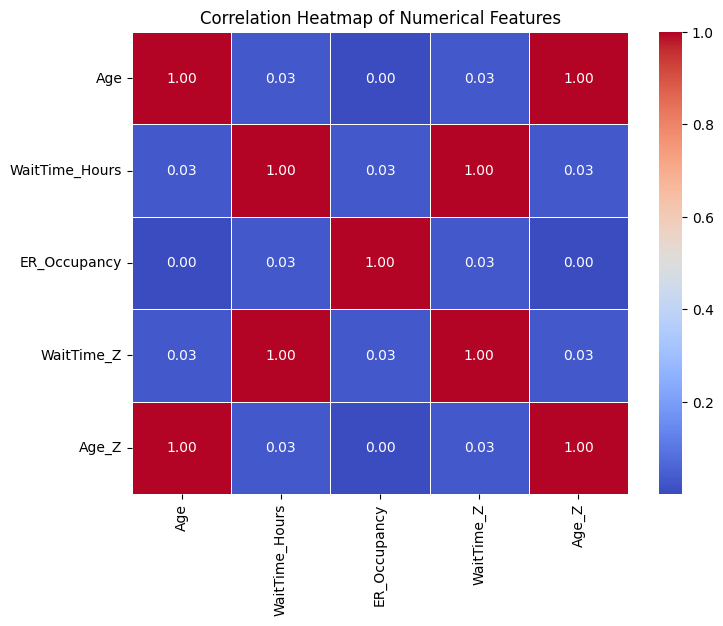

In [37]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 9. Feature Binning – Categorizing Age and WaitTime_Hours into groups

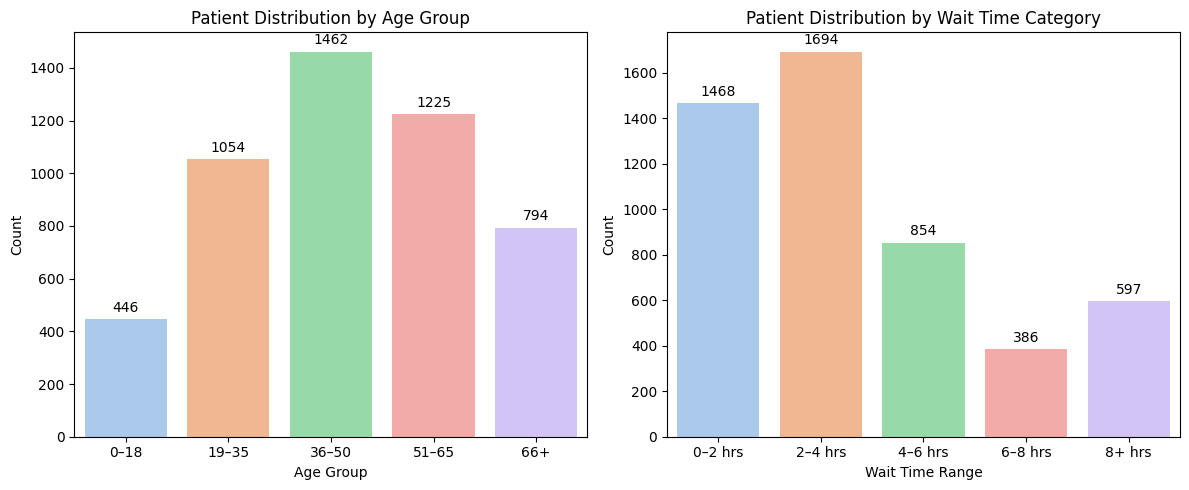

In [39]:
# 1. Bin Age into categories
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0–18', '19–35', '36–50', '51–65', '66+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# 2. Bin WaitTime_Hours into categories
wait_bins = [0, 2, 4, 6, 8, df['WaitTime_Hours'].max()]
wait_labels = ['0–2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8+ hrs']
df['WaitTime_Category'] = pd.cut(df['WaitTime_Hours'], bins=wait_bins, labels=wait_labels, right=False)

# 3. Plot: Count of patients by Age Group
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=df, x='Age_Group', hue='Age_Group', palette='pastel', legend=False)
ax1.set_title('Patient Distribution by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
for container in ax1.containers:
    ax1.bar_label(container, padding=3)

# 4. Plot: Count of patients by Wait Time Category
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=df, x='WaitTime_Category', hue='WaitTime_Category', palette='pastel', legend=False)
ax2.set_title('Patient Distribution by Wait Time Category')
ax2.set_xlabel('Wait Time Range')
ax2.set_ylabel('Count')
for container in ax2.containers:
    ax2.bar_label(container, padding=3)

plt.tight_layout()
plt.show()

### 10. Data Cleaning – Standardize category formatting, remove inconsistencie

In [45]:
# CTAS Level
ctas_table = pd.DataFrame(df['CTAS_Level'].unique(), columns=["Unique CTAS Levels"])
print("✅ Unique CTAS Levels:")
display(ctas_table)

# Season
season_table = pd.DataFrame(df['Season'].unique(), columns=["Unique Seasons"])
print("\n✅ Unique Seasons:")
display(season_table)

# DayOfWeek
day_table = pd.DataFrame(df['DayOfWeek'].unique(), columns=["Unique Weekdays"])
print("\n✅ Unique Weekdays:")
display(day_table)

✅ Unique CTAS Levels:


,Unique CTAS Levels
0,Ctas I-Iii (Discharged)
1,Ctas Iv-V (Discharged)
2,Admitted



✅ Unique Seasons:


,Unique Seasons
0,Winter
1,Spring
2,Fall
3,Summer



✅ Unique Weekdays:


,Unique Weekdays
0,Saturday
1,Thursday
2,Sunday
3,Tuesday
4,Friday
5,Monday
6,Wednesday


## **Hypothesis**

#### **T-test Statastical Test**

**<u>Hypothesis</u>:**

**H₀ (Null Hypothesis):** There is no significant difference in average ER wait times between CTAS I-III and CTAS IV-V patients.

**H₁ (Alternative Hypothesis):** There is a significant difference in average ER wait times between CTAS I-III and CTAS IV-V patients.

In [42]:
# Checking if there is a significant difference in wait times between CTAS I-III and CTAS IV-V
ctas_i_iii = df[df["CTAS_Level"] == "CTAS I-III (Discharged)"]["WaitTime_Hours"]
ctas_iv_v = df[df["CTAS_Level"] == "CTAS IV-V (Discharged)"]["WaitTime_Hours"]

t_stat, p_value = stats.ttest_ind(ctas_i_iii, ctas_iv_v, equal_var=False)  # Welch's t-test

# T-Test Results Display
print("\nT-Test Results:\n")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4e}")

# Hypothesis Testing
alpha = 0.05  # Significance level

# Interpretation
if p_value < alpha:
    print("\nConclusion: Reject Null Hypothesis H₀, meaning CTAS I-III and CTAS IV-V patients have significantly different ER wait times.")
else:
    print("\nConclusion: Fail to reject Null Hypothesis H₀, meaning there is no significant difference in ER wait times between the two groups.")


T-Test Results:

T-Statistic: 25.3275
P-Value: 2.1990e-130

Conclusion: Reject Null Hypothesis H₀, meaning CTAS I-III and CTAS IV-V patients have significantly different ER wait times.


**Interpretation of T-Test Results:**
 
- CTAS (Canadian Triage and Acuity Scale) categorizes ER patients based on urgency, from
    - CTAS I–III (higher urgency) to CTAS IV–V (lower urgency).
- The high T-statistic (25.3275) indicates a strong difference in wait times between CTAS I–III and CTAS IV–V patients.
- The p-value (2.1990e-130) < 0.05, so we reject the null hypothesis, confirming that CTAS I–III and CTAS IV–V patients experience significantly different wait times.
- This means that higher-acuity patients (CTAS I–III) generally wait longer than lower-acuity patients (CTAS IV–V), reinforcing the need for optimized triage and resource allocation in ERs.

#### **ANOVA Stastical Test**

**<u>Hypothesis</u>:**

**H₀ (Null Hypothesis):** There is no significant difference in average ER wait times across different CTAS levels.

**H₁ (Alternative Hypothesis):** There is a significant difference in average ER wait times across at least one of the CTAS levels.

In [43]:
# Performing ANOVA test
ctas_levels = df['CTAS_Level'].unique()
wait_time_groups = [df[df['CTAS_Level'] == level]['WaitTime_Hours'] for level in ctas_levels]
 
anova_result = stats.f_oneway(*wait_time_groups)
 
# Display ANOVA results
print("\nANOVA Test Results:\n")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"p-value: {anova_result.pvalue:.4f}")
 
# Interpretation
alpha = 0.05
if anova_result.pvalue < alpha:
    print("\nConclusion: Reject Null Hypothesis H₀, concluding that at least one CTAS level has a significantly different wait time compared to others.")
else:
    print("\nConclusion: Fail to reject Null Hypothesis H₀, meaning there is no significant difference in ER wait times across the CTAS levels.")


ANOVA Test Results:

F-statistic: 2263.0866
p-value: 0.0000

Conclusion: Reject Null Hypothesis H₀, concluding that at least one CTAS level has a significantly different wait time compared to others.


**Interpretation of ANOVA Results:**
 
- CTAS (Canadian Triage and Acuity Scale) categorizes ER patients based on urgency, from  
  - CTAS I (most critical) to CTAS V (least urgent).  
- The high F-statistic (2263.0866) suggests a strong variation in wait times across CTAS levels.  
- The p-value (0.0000) < 0.05, so we reject the null hypothesis, confirming CTAS levels significantly impact wait times.  
- This means patients with different urgency levels experience different wait times, highlighting the need for better ER resource allocation.

#### **Chi-Square Statastical Test**

**<u>Hypothesis</u>:**

**H₀ (Null Hypothesis):** There is no significant relationship between CTAS level and wait time category.

**H₁ (Alternative Hypothesis):** There is a significant relationship between CTAS level and wait time category.

**Create a categorical column for wait time**

In [44]:
# Define bins and labels
bins = [0, 3, 6, np.inf]  # Bins: Short (<3 hrs), Medium (3-6 hrs), Long (>6 hrs)
labels = ["Short", "Medium", "Long"]
 
# Create a new categorical column for wait time
df["WaitTime_Category"] = pd.cut(df["WaitTime_Hours"], bins=bins, labels=labels)
 
# Display the DataFrame
print(df)

                  Hospital       Region        Date  Age  \
0            St. Michael's      Toronto  2024-12-14   55   
1         Hamilton General     Hamilton  2024-03-28   27   
2               Sunnybrook      Toronto  2024-10-20   74   
3            St. Michael's      Toronto  2024-06-18   39   
4          Toronto General      Toronto  2024-05-10   53   
...                    ...          ...         ...  ...   
4995      Kingston General     Kingston  2024-08-04   74   
4996  Thunder Bay Regional  Thunder Bay  2024-12-30   31   
4997          Ottawa Civic       Ottawa  2024-02-28   56   
4998      Kingston General     Kingston  2024-11-01   49   
4999  Thunder Bay Regional  Thunder Bay  2024-11-06   48   

                   CTAS_Level  WaitTime_Hours  ER_Occupancy  DayOfWeek  \
0     CTAS I-III (Discharged)             2.0            84   Saturday   
1      CTAS IV-V (Discharged)             1.4            97   Thursday   
2     CTAS I-III (Discharged)             7.6            

**Explanation:**

* We created the WaitTime Category column to simplify analysis and identify patterns in ER wait times. By grouping wait times into categories (e.g., Short, Medium, Long), we can better compare trends, perform statistical tests like the Chi-Square test, and determine if factors like CTAS Level (patient urgency) influence how long patients wait.

**Perform Chi-Square Test**

In [45]:
# Create a contingency table for wait time categories vs. CTAS Level
contingency_table = pd.crosstab(df["WaitTime_Category"], df["CTAS_Level"])
 
 
# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
 
# Print Results
print("\nChi-Square Test Results:\n")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
 
 
# Interpret the Results
alpha = 0.05  # Significance level
 
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). The distribution of CTAS levels varies across wait time categories.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). No significant relationship between CTAS level and wait time category.")


Chi-Square Test Results:

Chi-Square Statistic: 2084.0424
P-value: 0.0000

Conclusion: Reject the null hypothesis (H₀). The distribution of CTAS levels varies across wait time categories.


**Interpretation of Chi-Square Test Results:**
 
- The Chi-Square Test evaluates whether there is a significant relationship between CTAS levels (patient urgency) and wait time categories (Short, Medium, Long).
- The high Chi-Square statistic (2084.0424) indicates a strong association between CTAS levels and wait time distribution. 
- The p-value (0.0000) < 0.05, so we reject the null hypothesis (H₀), confirming that wait time categories vary significantly across different CTAS levels.  
- This means that patient urgency (CTAS level) is strongly linked to how long they wait in the ER, reinforcing the importance of efficient triage systems to optimize patient flow and reduce delays.

## **Conclusion:**

- This study analyzed ER wait times in Ontario, focusing on CTAS levels and their impact on patient flow.  
- Exploratory Data Analysis (EDA) revealed that higher-acuity patients (CTAS I–III) experience longer wait times compared to lower-acuity patients (CTAS IV–V).  
- Statistical tests confirmed significant differences in wait times:  
  - **ANOVA results** showed that CTAS levels significantly impact ER wait durations.  
  - **T-Test results** confirmed CTAS I–III patients wait significantly longer than CTAS IV–V patients.  
  - **Chi-Square test** indicated a strong relationship between patient acuity and wait time categories (Short, Medium, Long).  
- AI-driven triage solutions were proposed to optimize resource allocation, reduce bottlenecks, and enhance patient prioritization.  
- The findings highlight the need for ER process improvements, including real-time triage monitoring, AI-based decision support, and better resource distribution to reduce wait times and improve patient outcomes.  